In [77]:
# Import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pprint import pprint
import json
from pandas.io.json import json_normalize

## Import Data

In [2]:
# Import data and put into dataframe
df = pd.read_json('ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [3]:
# Get the description
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [4]:
# Get the info and check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


We see that there are some missing values for the column avg_rating_of_driver, phone and avg_rating_by_driver.

## Data Cleaning

In [5]:
# Change the dtype for last_trip_date & signup_date to datetime64 and calculate the number of days the users active
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['days_active'] = df['last_trip_date'] - df['signup_date']

In [6]:
# Replace the NaN values for avg_rating_of_driver with 0 if they only take 0 or 1 trip
df.loc[(df['avg_rating_of_driver'].isnull()) & (df['trips_in_first_30_days'] <= 1), 'avg_rating_of_driver'] = 0

In [7]:
# Create a function to replace NaN values with average by number of trips
def replace_nan_avg(column, rating, trips):
    _avg = df[rating][df[column] == trips].mean()
    df.loc[(df[rating].isnull()) & (df[column] == trips), rating] = _avg

In [8]:
# Replace NaN in avg_rating_of_driver with mean grouped by trips_in_first_30_days
trips = df['trips_in_first_30_days'][df['avg_rating_of_driver'].isnull()].unique()

for x in trips:
    replace_nan_avg('trips_in_first_30_days', 'avg_rating_of_driver', x)

In [9]:
# Replace NaN in avg_rating_by_driver with mean grouped by trips_in_first_30_days
trips = df['trips_in_first_30_days'][df['avg_rating_by_driver'].isnull()].unique()

for x in trips:
    replace_nan_avg('trips_in_first_30_days', 'avg_rating_by_driver', x)

In [10]:
# Replace NaN in phone with Other
df['phone'] = df['phone'].fillna('Other')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   city                    50000 non-null  object         
 1   trips_in_first_30_days  50000 non-null  int64          
 2   signup_date             50000 non-null  datetime64[ns] 
 3   avg_rating_of_driver    50000 non-null  float64        
 4   avg_surge               50000 non-null  float64        
 5   last_trip_date          50000 non-null  datetime64[ns] 
 6   phone                   50000 non-null  object         
 7   surge_pct               50000 non-null  float64        
 8   ultimate_black_user     50000 non-null  bool           
 9   weekday_pct             50000 non-null  float64        
 10  avg_dist                50000 non-null  float64        
 11  avg_rating_by_driver    50000 non-null  float64        
 12  days_active             50000 no

We can see that there are no more missing values in the data.

## Exploratory Data Analysis (EDA)

In [12]:
# Create a new column to indicate if the driver is retained
df['retained'] = [1 if x.month >= 6 else 0 for x in df.last_trip_date] 

In [13]:
# Separate the data into 2 dataframes (retained vs not_retained)
df_retained = df[df['retained'] == 1]
df_not_retained = df[df['retained'] == 0]

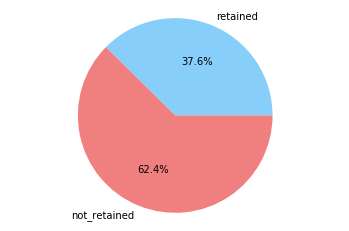

In [14]:
labels = 'retained', 'not_retained'
sizes = [len(df_retained), len(df_not_retained)]
colors = ['lightskyblue', 'lightcoral']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

### By City

In [15]:
by_city = df_retained[['trips_in_first_30_days', 'city']].groupby('city').count().sort_values(by=['trips_in_first_30_days'], ascending = False).reset_index()
by_city

,city,trips_in_first_30_days
0,Winterfell,8213
1,King's Landing,6363
2,Astapor,4228


Text(0.5, 1.0, 'Count of Trips by City')

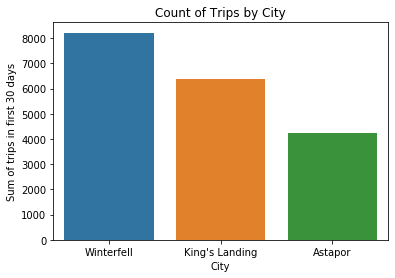

In [16]:
sns.barplot(x='city', y='trips_in_first_30_days', data=by_city)
plt.xlabel('City')
plt.ylabel('Sum of trips in first 30 days')
plt.title('Count of Trips by City')

In [17]:
by_city = df_retained[['trips_in_first_30_days', 'city']].groupby('city').sum().sort_values(by=['trips_in_first_30_days'], ascending = False).reset_index()
by_city

,city,trips_in_first_30_days
0,Winterfell,31016
1,King's Landing,18600
2,Astapor,12556


Text(0.5, 1.0, 'Sum of Trips by City')

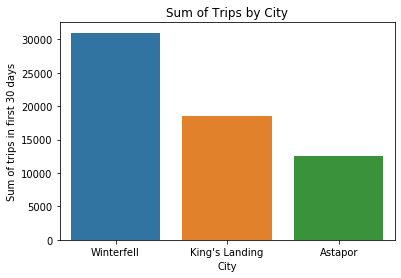

In [18]:
sns.barplot(x='city', y='trips_in_first_30_days', data=by_city)
plt.xlabel('City')
plt.ylabel('Sum of trips in first 30 days')
plt.title('Sum of Trips by City')

Grouping by the city that the trips took place, 45% of the drivers and 50% of total sum of trips exist in Winterfell. We might guess that being a driver in Winterfell can be a good feature for active users.

### By phone

In [19]:
by_phone = df_retained[['trips_in_first_30_days', 'phone']].groupby('phone').count().sort_values(by=['trips_in_first_30_days'], ascending = False).reset_index()
by_phone

,phone,trips_in_first_30_days
0,iPhone,15525
1,Android,3146
2,Other,133


Text(0.5, 1.0, 'Count of Trips by Phone')

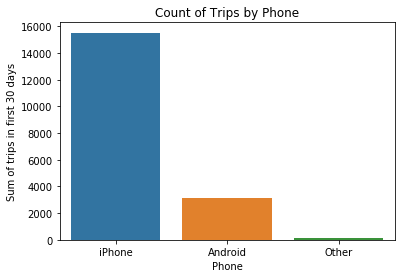

In [20]:
sns.barplot(x='phone', y='trips_in_first_30_days', data=by_phone)
plt.xlabel('Phone')
plt.ylabel('Sum of trips in first 30 days')
plt.title('Count of Trips by Phone')

In [21]:
by_phone = df_retained[['trips_in_first_30_days', 'phone']].groupby('phone').sum().sort_values(by=['trips_in_first_30_days'], ascending = False).reset_index()
by_phone

,phone,trips_in_first_30_days
0,iPhone,52311
1,Android,9393
2,Other,468


Text(0.5, 1.0, 'Count of Trips by Phone')

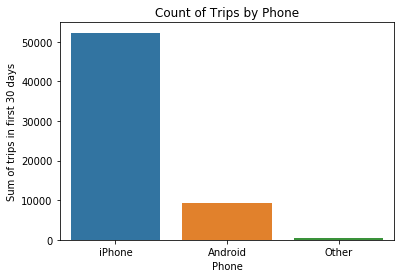

In [22]:
sns.barplot(x='phone', y='trips_in_first_30_days', data=by_phone)
plt.xlabel('Phone')
plt.ylabel('Sum of trips in first 30 days')
plt.title('Count of Trips by Phone')

Grouping by phone use cases, we see that majority of the drivers were using iPhone. It is hard to deduce any insights from this.

Grouping by phone use cases, we see that majority of the drivers were using iPhone. It is hard to deduce any insights from this.

### Correlation Plot

In [23]:
# Pick out continuous variables
df_corr = df[['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
           'surge_pct', 'trips_in_first_30_days', 'weekday_pct', 'city']]

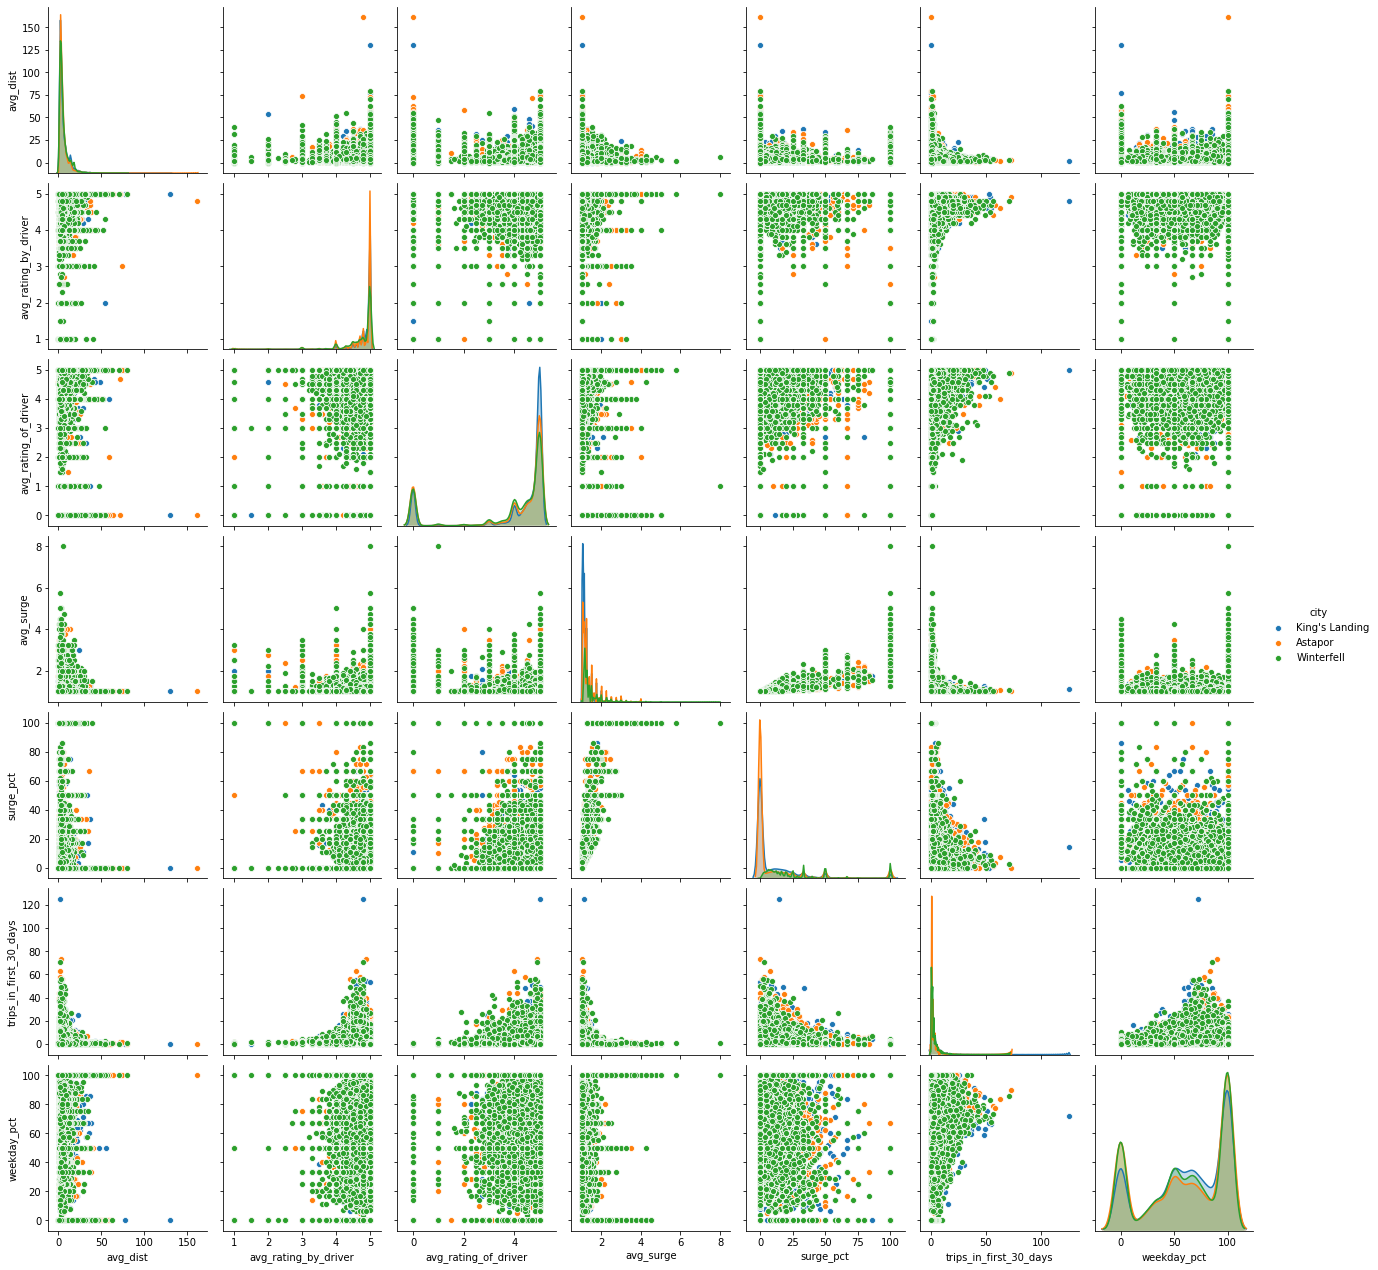

In [24]:
sns.pairplot(df_corr, hue='city')

From the pairplot, we can see that some of the variables correlate with each other thus we cannot use any linear model (assume variables are independent). The choices of model that will be used here are:
1. KNeighbors
2. RandomForestClassifier

## Predictive Modeling

In [82]:
# drop timedate columns
df_k = df.drop(['last_trip_date', 'signup_date', 'days_active'], axis=1)

In [83]:
# make discrete variables to be continuous
df_k = pd.get_dummies(df_k)

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

# split into data and labels
data = df_k.drop('retained', axis=1)
labels = df_k['retained'] 

In [85]:
# split into train and test
X_train, y_train, X_test, y_test = train_test_split(data, labels, test_size=0.3, random_state=19)

# normalize the train dataset
X_train = normalize(X_train)
y_train = normalize(y_train)

### KNeighbors

#### Setting the Model

In [86]:
from sklearn.neighbors import KNeighborsClassifier

# initialize with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, X_test)

# test the accuracy
knn.score(y_train, y_test)

0.7442666666666666

By guessing the number of neighbors to be 10 and using out of the box algorithm, we came up with a pretty good accuracy score,  but we might want to figure out the best parameters to be plugged in to the algorith by using GridSearch.

In [87]:
# check what parameters are being used for the KNN model
pprint(knn.get_params())

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [95]:
from sklearn.model_selection import GridSearchCV

# specify which paramters to be optimized
n_neighbors = [int(x) for x in np.linspace(start = 5, stop = 20, num = 8)]

parameters = {
    'n_neighbors': n_neighbors,
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

In [94]:
n_neighbors = [int(x) for x in np.linspace(start = 5, stop = 20, num = 8)]
n_neighborsx

[5, 7, 9, 11, 13, 15, 17, 20]

In [99]:
# setup the model using the combinations of different parameters
knn_cv = GridSearchCV(knn, parameters, cv=5)

knn_cv.fit(X_train, X_test)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 20],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [97]:
# get the best parameters
knn_cv.best_params_

{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}

In [98]:
# check the accuracy with best parameters
knn_cv.score(y_train, y_test)

0.7595333333333333

We see that there is a 1.53% improvement in accuracy score after we tuned the parameters. 

#### Model Performance

We also want to see the statistics for the model with the tuned parameters

In [100]:
from sklearn.metrics import classification_report, confusion_matrix

# predict and print the classification report
y_pred = knn_cv.predict(y_train)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      9340
           1       0.71      0.61      0.66      5660

    accuracy                           0.76     15000
   macro avg       0.75      0.73      0.74     15000
weighted avg       0.76      0.76      0.76     15000



In [101]:
# print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[7961 1379]
 [2228 3432]]


C:\Users\Vince\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


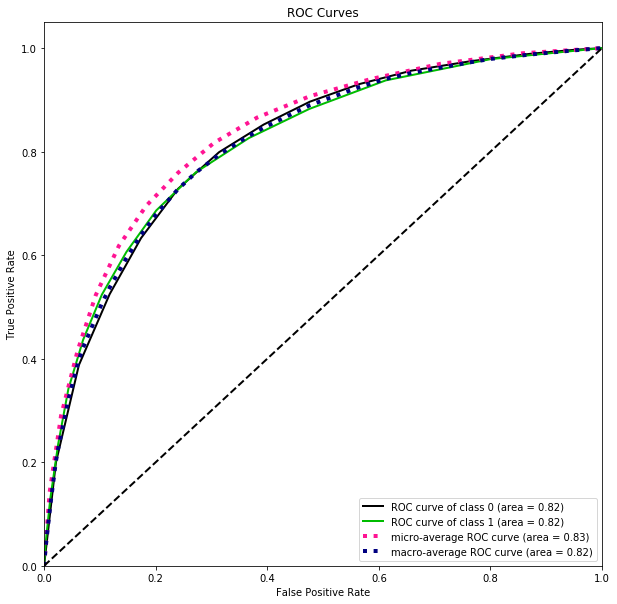

In [102]:
import scikitplot as skplt
from sklearn.metrics import roc_auc_score

y_proba = knn_cv.predict_proba(y_train)
skplt.metrics.plot_roc_curve(y_test, y_proba, figsize=(10,10))
plt.show()

In [103]:
roc_auc_score(y_test, y_pred)

0.7293579422068537

From the results above, we see that the model is able to predict 3 out of 4 times right with the set parameters and random_state. It is quite good but we see that the model is better at predicting inactive users compare to active users.

#### Feature Importance

In [38]:
from sklearn.model_selection import cross_val_score

features = data.shape[1]
features_names = data.columns

for i in range(features):
    X = data.iloc[:, i].values.reshape(-1, 1)
    knn_feat_test = KNeighborsClassifier(n_neighbors = 13, weights = 'uniform', metric = 'manhattan')
    scores = cross_val_score(knn_feat_test, X, labels)
    print(features_names[i], scores.mean() * 100)

trips_in_first_30_days 63.902
avg_rating_of_driver 68.01
avg_surge 70.434
surge_pct 71.51799999999999
ultimate_black_user 62.36200000000001
weekday_pct 72.672
avg_dist 59.292
avg_rating_by_driver 70.306
city_Astapor 57.28199999999999
city_King's Landing 67.584
city_Winterfell 53.038
phone_Android 62.392
phone_Other 42.748
phone_iPhone 59.754000000000005


From the features importance list, weekday_pct has the highest mean scores followed by surge_pct and avg_rating_by_driver. It indicates that in order to have drivers retained, they need to be working on weekdays and get the surge percentage during rush hours. Also, the passengers that they carried must be high in ratings.

### Random Forests

#### Setting the Model

In [104]:
# drop ultimate_black_user from the dataset
data = df_k.drop(['retained','ultimate_black_user'], axis=1)
labels = df_k['retained'] 

In [105]:
# set the datatype to int64
data = data.astype(
    {
        'avg_rating_of_driver':'int64', 
        'avg_surge':'int64', 
        'surge_pct':'int64', 
        'weekday_pct':'int64', 
        'avg_dist':'int64',
        'avg_rating_by_driver':'int64'
    })

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# initialize the model with 100 estimators
clf = RandomForestClassifier(n_estimators = 100)

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=19)

In [42]:
# fit the train data to the model
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
# predict using the test set
y_pred = clf.predict(X_test)

In [44]:
# check the accuracy score
metrics.accuracy_score(y_test, y_pred)

0.7530666666666667

Same as the KNN model, we ge araound 75% accuracy to predict the active user.

In [78]:
# check the parameters that are being used by the model
pprint(clf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [48]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [64]:
# initialize the cross-validation model
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=19, n_jobs = -1)

In [65]:
# fit the train data to the model
clf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [66]:
# print the best estimator
clf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

In [67]:
# use the best estimator for the model
best_grid = clf_random.best_estimator_

In [71]:
# predict the result
y_pred = best_grid.predict(X_test)

# check the accuracy score
metrics.accuracy_score(y_test, y_pred)

0.7798666666666667

After we tuned the parameters, we get a 2.67% improvement to the accuracy score.

#### Model Performance

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      9340
           1       0.74      0.65      0.69      5660

    accuracy                           0.78     15000
   macro avg       0.77      0.75      0.76     15000
weighted avg       0.78      0.78      0.78     15000



In [73]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[8041 1299]
 [2003 3657]]


#### Feature Importance

In [75]:
# using the best parameters to get the best important features
feature_imp = pd.Series(best_grid.feature_importances_, index=data.columns).sort_values(ascending=False)

In [76]:
# print the feature importances
feature_imp

avg_rating_by_driver      0.190179
weekday_pct               0.180751
surge_pct                 0.166227
city_King's Landing       0.144318
trips_in_first_30_days    0.080432
phone_Android             0.054916
phone_iPhone              0.054559
city_Astapor              0.037310
avg_dist                  0.032702
avg_rating_of_driver      0.031072
city_Winterfell           0.023736
avg_surge                 0.003223
phone_Other               0.000575
dtype: float64

Comparing to the KNN model, we see the same top 3 features that are important in retaining the drivers but in different order: avg_rating_by_driver, weekday_pct, and surge_pct.